# HOSPITAL RATING CLASSIFICATION

Welcome to the Starter Code for the Hospital Rating Classification Capstone Project!

In this notebook you'll find 
- A blueprint on how to attempt the course project.
- Additional hints and directions on different tasks

Please note that this approach is one of the many approaches you can take for solving this Capstone project.

### Import the necessary libraries

In [1]:
import pandas as pd, numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from pandas.core.common import random_state

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.linear_model import Lasso, LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Task 1 

Task 1: Understand the data

 

Take some time to familiarize yourself with the data. What are the key variables?

Specifically, answer the following questions:

- 1.1 - Perform a few basic data quality checks to understand the different columns and prepare descriptive statistics for some of the important columns.
- 1.2 - What is the distribution of hospital overall ratings? How are they varying across other parameters like `State`? Create  a few visualizations that provide some insights into the data.

##### Task 1.1

In [5]:
DATA_PATH= r'C:\Users\deole\Downloads\hospital-info.csv'
data=pd.read_csv(DATA_PATH, encoding='latin-1')
pd.set_option('display.max_columns', 100)
data.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score,rating_group,READM_30_AMI_Score,READM_30_CABG_Score,READM_30_COPD_Score,READM_30_HF_Score,READM_30_HIP_KNEE_Score,READM_30_HOSP_WIDE_Score,READM_30_PN_Score,READM_30_STK_Score,TIME_OP_21_Score,TIME_OP_5_Score,EFF_EDV_Score,EFF_ED_1b_Score,EFF_ED_2b_Score,EFF_IMM_2_Score,EFF_IMM_3_OP_27_FAC_ADHPCT_Score,EFF_OP_18b_Score,EFF_OP_20_Score,EFF_OP_22_Score,EFF_OP_29_Score,EFF_OP_30_Score,EFF_OP_4_Score,EFF_PC_01_Score,EFF_STK_1_Score,EFF_STK_10_Score,EFF_STK_2_Score,EFF_STK_4_Score,EFF_STK_5_Score,EFF_STK_6_Score,EFF_VTE_1_Score,EFF_VTE_2_Score,EFF_VTE_3_Score,EFF_VTE_5_Score,EFF_VTE_6_Score,EXP_H_CLEAN_STAR_RATING_Score,EXP_H_COMP_1_STAR_RATING_Score,EXP_H_COMP_2_STAR_RATING_Score,EXP_H_COMP_3_STAR_RATING_Score,EXP_H_COMP_4_STAR_RATING_Score,EXP_H_COMP_5_STAR_RATING_Score,EXP_H_COMP_6_STAR_RATING_Score,EXP_H_COMP_7_STAR_RATING_Score,EXP_H_HSP_RATING_STAR_RATING_Score,EXP_H_QUIET_STAR_RATING_Score,EXP_H_RECMND_STAR_RATING_Score,EXP_H_STAR_RATING_Score,SAFETY_COMP_HIP_KNEE_Score,SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score,SAFETY_PSI_13_POST_SEPSIS_Score,SAFETY_PSI_14_POSTOP_DEHIS_Score,SAFETY_PSI_15_ACC_LAC_Score,SAFETY_PSI_3_ULCER_Score,SAFETY_PSI_4_SURG_COMP_Score,SAFETY_PSI_6_IAT_PTX_Score,SAFETY_PSI_7_CVCBI_Score,SAFETY_PSI_90_SAFETY_Score,SAFETY_HAI_1_SIR_Score,SAFETY_HAI_1a_SIR_Score,SAFETY_HAI_2_SIR_Score,SAFETY_HAI_2a_SIR_Score,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Government,Yes,3,1,2,1,0,1,1,1,-12.500000,-4.200000,-9.3,-12.4,-15.5,-15.40000,1.0,16.500000,15.10000,21.1,21.4,5.100000,15.4,18.7,12.700000,-99.0,-8.255205,-2.0,-269.0,-68.0,97.0,81.0,-196.0,-65.0,-4.0,72.820855,82.0,96.12304,-0.000000,99.00000,96.000000,100.000000,67.000000,98.00000,99.000000,97.0,99.00000,91.000000,90.000000,-0.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.00000,-3.800000,-3.320000,-5.720000,-2.720000,-1.35,-0.07,-168.260000,-0.36,-0.12,-0.68,-1.740000,-2.433000,-1.427000,-2.307000,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Government,Yes,3,0,1,2,1,1,2,0,-16.000000,-3.331371,-7.6,-15.5,-20.8,-15.50000,1.0,16.700000,14.40761,18.0,21.9,5.700000,14.9,16.4,13.400000,-60.0,-12.000000,-3.0,-243.0,-71.0,99.0,83.0,-117.0,-27.0,-2.0,92.000000,92.0,99.00000,-1.000000,98.00000,99.000000,100.000000,89.591422,99.00000,88.000000,95.0,94.00000,100.000000,100.000000,-2.030869,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,2.000000,4.000000,4.000000,3.000000,3.00000,-3.000000,-5.630000,-9.180000,-2.110000,-1.25,-0.14,-179.050000,-0.47,-0.11,-0.85,-1.062000,-0.648000,-0.456000,-0.698000,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Government,Yes,2,0,1,1,0,1,2,1,-16.700000,-4.100000,-7.1,-15.6,-18.2,-17.90000,0.0,16.100000,15.20000,19.8,20.6,5.000000,15.4,17.9,12.000000,-58.0,-8.255205,-2.0,-217.0,-78.0,100.0,87.0,-133.0,-10.0,-1.0,70.000000,88.0,96.12304,-0.000000,99.00000,100.000000,100.000000,89.591422,99.00000,97.000000,98.0,89.00000,86.000000,92.000000,-0.

In [28]:
data.shape

(3057, 94)

In [4]:
##Check the data type of the different columns
## Hint - You can use the .info() method here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3057 non-null   int64  
 1   Hospital Name                                         3057 non-null   object 
 2   Address                                               3057 non-null   object 
 3   City                                                  3057 non-null   object 
 4   State                                                 3057 non-null   object 
 5   ZIP Code                                              3057 non-null   int64  
 6   County Name                                           3057 non-null   object 
 7   Phone Number                                          3057 non-null   int64  
 8   Hospital Ownership                                    3057

Note down your observations after completing the above task. You should ask questions such as:

- Check for non-null columns. Do you see any column having missing values?
- Are the datatypes correct for all the variables? You might have to convert a few of them to categorical later

In [5]:
data.isnull().sum()

Provider ID        0
Hospital Name      0
Address            0
City               0
State              0
                  ..
MED_OP_11_Score    0
MED_OP_13_Score    0
MED_OP_14_Score    0
MED_OP_8_Score     0
MED_OP_9_Score     0
Length: 94, dtype: int64

##### Task 1.2

In [8]:
## Descriptive Statistics
## Let's take the main measures and the hospital overall rating first.
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

In [9]:
data1=data.drop(features, axis=1)
data1.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Ownership,Emergency Services,Hospital overall rating,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score,rating_group,READM_30_AMI_Score,READM_30_CABG_Score,READM_30_COPD_Score,READM_30_HF_Score,READM_30_HIP_KNEE_Score,READM_30_HOSP_WIDE_Score,READM_30_PN_Score,READM_30_STK_Score,TIME_OP_21_Score,TIME_OP_5_Score,EFF_EDV_Score,EFF_ED_1b_Score,EFF_ED_2b_Score,EFF_IMM_2_Score,EFF_IMM_3_OP_27_FAC_ADHPCT_Score,EFF_OP_18b_Score,EFF_OP_20_Score,EFF_OP_22_Score,EFF_OP_29_Score,EFF_OP_30_Score,EFF_OP_4_Score,EFF_PC_01_Score,EFF_STK_1_Score,EFF_STK_10_Score,EFF_STK_2_Score,EFF_STK_4_Score,EFF_STK_5_Score,EFF_STK_6_Score,EFF_VTE_1_Score,EFF_VTE_2_Score,EFF_VTE_3_Score,EFF_VTE_5_Score,EFF_VTE_6_Score,EXP_H_CLEAN_STAR_RATING_Score,EXP_H_COMP_1_STAR_RATING_Score,EXP_H_COMP_2_STAR_RATING_Score,EXP_H_COMP_3_STAR_RATING_Score,EXP_H_COMP_4_STAR_RATING_Score,EXP_H_COMP_5_STAR_RATING_Score,EXP_H_COMP_6_STAR_RATING_Score,EXP_H_COMP_7_STAR_RATING_Score,EXP_H_HSP_RATING_STAR_RATING_Score,EXP_H_QUIET_STAR_RATING_Score,EXP_H_RECMND_STAR_RATING_Score,EXP_H_STAR_RATING_Score,SAFETY_COMP_HIP_KNEE_Score,SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score,SAFETY_PSI_13_POST_SEPSIS_Score,SAFETY_PSI_14_POSTOP_DEHIS_Score,SAFETY_PSI_15_ACC_LAC_Score,SAFETY_PSI_3_ULCER_Score,SAFETY_PSI_4_SURG_COMP_Score,SAFETY_PSI_6_IAT_PTX_Score,SAFETY_PSI_7_CVCBI_Score,SAFETY_PSI_90_SAFETY_Score,SAFETY_HAI_1_SIR_Score,SAFETY_HAI_1a_SIR_Score,SAFETY_HAI_2_SIR_Score,SAFETY_HAI_2a_SIR_Score,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Government,Yes,3,-12.500000,-4.200000,-9.3,-12.4,-15.5,-15.40000,1.0,16.500000,15.10000,21.1,21.4,5.100000,15.4,18.7,12.700000,-99.0,-8.255205,-2.0,-269.0,-68.0,97.0,81.0,-196.0,-65.0,-4.0,72.820855,82.0,96.12304,-0.000000,99.00000,96.000000,100.000000,67.000000,98.00000,99.000000,97.0,99.00000,91.000000,90.000000,-0.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.00000,-3.800000,-3.320000,-5.720000,-2.720000,-1.35,-0.07,-168.260000,-0.36,-0.12,-0.68,-1.740000,-2.433000,-1.427000,-2.307000,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Government,Yes,3,-16.000000,-3.331371,-7.6,-15.5,-20.8,-15.50000,1.0,16.700000,14.40761,18.0,21.9,5.700000,14.9,16.4,13.400000,-60.0,-12.000000,-3.0,-243.0,-71.0,99.0,83.0,-117.0,-27.0,-2.0,92.000000,92.0,99.00000,-1.000000,98.00000,99.000000,100.000000,89.591422,99.00000,88.000000,95.0,94.00000,100.000000,100.000000,-2.030869,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,2.000000,4.000000,4.000000,3.000000,3.00000,-3.000000,-5.630000,-9.180000,-2.110000,-1.25,-0.14,-179.050000,-0.47,-0.11,-0.85,-1.062000,-0.648000,-0.456000,-0.698000,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Government,Yes,2,-16.700000,-4.100000,-7.1,-15.6,-18.2,-17.90000,0.0,16.100000,15.20000,19.8,20.6,5.000000,15.4,17.9,12.000000,-58.0,-8.255205,-2.0,-217.0,-78.0,100.0,87.0,-133.0,-10.0,-1.0,70.000000,88.0,96.12304,-0.000000,99.00000,100.000000,100.000000,89.591422,99.00000,97.000000,98.0,89.00000,86.000000,92.000000,-0.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,4.000000,2.000000,3.00000,-3.800000,-3.850000,-10.254041,-2.500000,-1.93,-0.09,-198.330000,-0.41,-0.24,-0.91,-0.341000,-0.443000,-0.641000,-0.801000,-0.31000,-0.871177,-1.261000,-0.513,-11.8,-4.600000,-0.000000,-4.600000,-45

In [29]:
data1.shape

(3057, 87)

In [11]:
### Filter out the above columns from the DataFrame and compute the descriptive statistics
### Hint - The .describe() method might be useful
data1.describe()

,Provider ID,ZIP Code,Phone Number,Hospital overall rating,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score,rating_group,READM_30_AMI_Score,READM_30_CABG_Score,READM_30_COPD_Score,READM_30_HF_Score,READM_30_HIP_KNEE_Score,READM_30_HOSP_WIDE_Score,READM_30_PN_Score,READM_30_STK_Score,TIME_OP_21_Score,TIME_OP_5_Score,EFF_EDV_Score,EFF_ED_1b_Score,EFF_ED_2b_Score,EFF_IMM_2_Score,EFF_IMM_3_OP_27_FAC_ADHPCT_Score,EFF_OP_18b_Score,EFF_OP_20_Score,EFF_OP_22_Score,EFF_OP_29_Score,EFF_OP_30_Score,EFF_OP_4_Score,EFF_PC_01_Score,EFF_STK_1_Score,EFF_STK_10_Score,EFF_STK_2_Score,EFF_STK_4_Score,EFF_STK_5_Score,EFF_STK_6_Score,EFF_VTE_1_Score,EFF_VTE_2_Score,EFF_VTE_3_Score,EFF_VTE_5_Score,EFF_VTE_6_Score,EXP_H_CLEAN_STAR_RATING_Score,EXP_H_COMP_1_STAR_RATING_Score,EXP_H_COMP_2_STAR_RATING_Score,EXP_H_COMP_3_STAR_RATING_Score,EXP_H_COMP_4_STAR_RATING_Score,EXP_H_COMP_5_STAR_RATING_Score,EXP_H_COMP_6_STAR_RATING_Score,EXP_H_COMP_7_STAR_RATING_Score,EXP_H_HSP_RATING_STAR_RATING_Score,EXP_H_QUIET_STAR_RATING_Score,EXP_H_RECMND_STAR_RATING_Score,EXP_H_STAR_RATING_Score,SAFETY_COMP_HIP_KNEE_Score,SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score,SAFETY_PSI_13_POST_SEPSIS_Score,SAFETY_PSI_14_POSTOP_DEHIS_Score,SAFETY_PSI_15_ACC_LAC_Score,SAFETY_PSI_3_ULCER_Score,SAFETY_PSI_4_SURG_COMP_Score,SAFETY_PSI_6_IAT_PTX_Score,SAFETY_PSI_7_CVCBI_Score,SAFETY_PSI_90_SAFETY_Score,SAFETY_HAI_1_SIR_Score,SAFETY_HAI_1a_SIR_Score,SAFETY_HAI_2_SIR_Score,SAFETY_HAI_2a_SIR_Score,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
count,3057.000000,3057.000000,3.057000e+03,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000
mean,261817.891397,51757.296696,5.913678e+09,3.025842,-14.052018,-3.331371,-8.072746,-12.041911,-16.351943,-14.889518,1.028132,16.893504,14.407610,20.014010,21.997482,4.615404,15.595580,17.222462,12.584958,-54.139913,-8.254962,-1.374634,-290.119280,-110.186406,94.247016,84.556726,-149.921648,-27.507017,-1.883874,72.830610,80.310070,96.121772,-2.418369,96.605034,97.859752,99.070905,89.591422,98.203343,95.630216,94.046487,96.903971,93.227547,92.881824,-2.031534,2.717122,3.419047,3.097665,3.163563,3.078043,2.956733,3.289245,2.537315,3.410260,2.905028,3.082785,3.099671,-3.042802,-5.045747,-10.254638,-2.318984,-1.442319,-0.451733,-136.771392,-0.406804,-0.169480,-0.890671,-0.539753,-0.529125,-0.482235,-0.581446,-0.963980,-0.871177,-0.986907,-0.842215,-8.697796,-2.937054,-4.716686,-2.965375,-39.967077,-9.146034
std,159800.930561,27935.174759,2.383292e+09,0.869600,1.096588,0.507906,1.140871,1.453870,2.165716,1.519375,0.730233,0.803807,0.652568,1.310722,1.567900,0.508504,0.930506,1.529985,0.980174,17.073258,3.846743,1.058846,95.068348,63.936677,8.786163,14.325378,39.359548,15.948352,1.810451,25.179653,20.818373,3.855109,3.663136,6.114886,3.688058,1.944785,9.394915,2.923059,6.873313,9.735851,4.990993,7.200793,9.374059,3.069265,0.916015,0.861928,0.973600,0.957342,0.762970,0.822711,0.853536,0.958843,0.872412,1.061326,1.01215

In [12]:
def get_count_percentage(df, grouper,feature):
    df_cnt=df.groupby(grouper)[feature].apply(lambda x: x.value_counts())
    df_cnt.name="{}_cnt".format(feature)
    df_cnt_pct=data1.groupby(grouper)[feature].apply(lambda x: x.value_counts(normalize=True))
    df_cnt_pct.name="{}_cnt_pct".format(feature)
    df_cnt_pct=df_cnt_pct.apply(lambda x: "{:4.2f}%".format(x*100))
    df_merged = pd.concat([df_cnt,df_cnt_pct])
    return df_merged

In [13]:
rating_cnt_pct = get_count_percentage(data,grouper="Hospital Ownership", feature="Hospital overall rating")
rating_cnt_pct
                        

Hospital Ownership   
Government          3       237
                    2       109
                    4       100
                    1        32
                    5         7
Others              3       303
                    2       173
                    4       122
                    5        40
                    1        28
Voluntary           3       885
                    4       527
                    2       374
                    5        63
                    1        57
Government          3    48.87%
                    2    22.47%
                    4    20.62%
                    1     6.60%
                    5     1.44%
Others              3    45.50%
                    2    25.98%
                    4    18.32%
                    5     6.01%
                    1     4.20%
Voluntary           3    46.43%
                    4    27.65%
                    2    19.62%
                    5     3.31%
                    1     2.99%
dtype: object

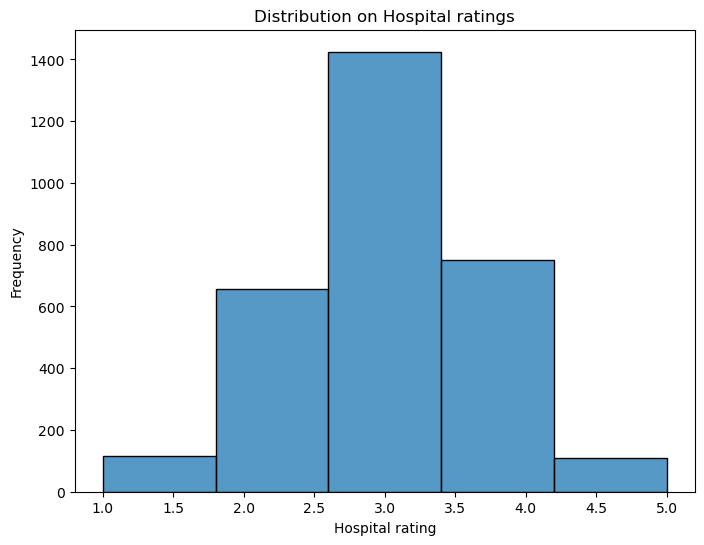

count    3057.000000
mean        3.025842
std         0.869600
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Hospital overall rating, dtype: float64

In [14]:
### Analyze your target variable - "Hospital overall rating"
### How does the ratings distribution look like for all the hospitals?
data1["Hospital overall rating"] = data1["Hospital overall rating"].astype(int)
plt.figure(figsize=(8,6))
sns.histplot(data1["Hospital overall rating"], bins=5, kde=False)
plt.title("Distribution on Hospital ratings")
plt.xlabel("Hospital rating")
plt.ylabel("Frequency")
plt.show()
data1["Hospital overall rating"].describe()

##### Average rating across all hospital is 3.02

### Average Rating by state

In [15]:
data1.groupby("State")["Hospital overall rating"].agg(['mean','count','median', 'std'])

,mean,count,median,std
State,,,,
AK,2.857143,7,3.0,0.377964
AL,3.038462,78,3.0,0.710630
AR,2.697674,43,3.0,0.802819
AZ,3.000000,53,3.0,0.898717
CA,2.883392,283,3.0,0.848762
CO,3.500000,44,3.5,0.590624
CT,2.678571,28,3.0,0.611832
DC,1.428571,7,1.0,0.786796
DE,3.666667,6,4.0,0.516398


In [52]:
### Dc has lowest median rating of 1 with count of 7, while higest rating are WI, UT, SD, NH, MT, MN, ME, IN, ID, DE with 4 

In [16]:
### Does Ownership of the hospital matter??
data.groupby("Hospital Ownership")["Hospital overall rating"].agg(['mean','count','median', 'std'])

,mean,count,median,std
Hospital Ownership,,,,
Government,2.878351,485,3.0,0.859827
Others,2.959459,666,3.0,0.922489
Voluntary,3.086569,1906,3.0,0.847016


In [17]:
### Goverment owned hospital have lower rating

In [18]:
###### score of 2 indicates the hospital performs better than the national average
###### score of 1 indicates the hospital's performance is similar to the national average
###### score of 0 indicates the hospital's performance is worse than the national average

##### Mortality Comparison

In [19]:
data.groupby("Mortality national comparison")["Hospital overall rating"].agg(['mean','count','median', 'std'])

,mean,count,median,std
Mortality national comparison,,,,
0,2.482456,342,2.0,0.776100
1,3.060475,2315,3.0,0.841227
2,3.290000,400,3.0,0.918154


### Safety Of Care

In [20]:
data.groupby("Safety of care national comparison")["Hospital overall rating"].agg(['mean','count','median', 'std'])

,mean,count,median,std
Safety of care national comparison,,,,
0,2.362556,673,2.0,0.814248
1,3.098734,1580,3.0,0.739117
2,3.437811,804,3.0,0.836504


### Readmission

In [21]:
data.groupby("Readmission national comparison")["Hospital overall rating"].agg(['mean','count','median', 'std'])

,mean,count,median,std
Readmission national comparison,,,,
0,2.375443,847,2.0,0.767706
1,3.112051,1419,3.0,0.742230
2,3.567636,791,4.0,0.737882


### Patient Experience

In [22]:
data.groupby("Patient experience national comparison")["Hospital overall rating"].agg(['mean','count','median', 'std'])

,mean,count,median,std
Patient experience national comparison,,,,
0,2.416899,1077,2.0,0.746623
1,3.086917,1093,3.0,0.650966
2,3.689966,887,4.0,0.715627


### Effective Care

In [23]:
data.groupby("Effectiveness of care national comparison")["Hospital overall rating"].agg(['mean','count','median', 'std'])

,mean,count,median,std
Effectiveness of care national comparison,,,,
0,2.721393,402,3.0,0.768449
1,3.068510,1664,3.0,0.876701
2,3.077699,991,3.0,0.872137


### Timeliness of care

In [24]:
data.groupby("Timeliness of care national comparison")["Hospital overall rating"].agg(['mean','count','median', 'std'])

,mean,count,median,std
Timeliness of care national comparison,,,,
0,2.618040,898,3.0,0.898399
1,3.181545,1333,3.0,0.849866
2,3.217918,826,3.0,0.707342


### Efficient use of medical imaging

In [25]:
data.groupby("Efficient use of medical imaging national comparison")["Hospital overall rating"].agg(['mean','count','median', 'std'])

,mean,count,median,std
Efficient use of medical imaging national comparison,,,,
0,2.858824,340,3.0,0.822299
1,3.048770,2358,3.0,0.868872
2,3.033426,359,3.0,0.902509


### Observation

In [26]:
# Difference between score of 2 & score of 0 is higest in Patient experience with 1.27
#All variable have an impact on hospital rating

In [92]:
master_data=data1[['Provider ID','Hospital Ownership','Hospital overall rating']]

In [110]:
df_mort=data1[['Provider ID','Hospital Ownership','Hospital overall rating','MORT_30_AMI_Score', 'MORT_30_CABG_Score', 'MORT_30_COPD_Score','MORT_30_HF_Score', 'MORT_30_PN_Score','MORT_30_STK_Score']]
df_mort.set_index('Provider ID', inplace= True)
df_mort.head()

,Hospital Ownership,Hospital overall rating,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score
Provider ID,,,,,,,,
10001,Government,3,-12.500000,-4.200000,-9.3,-12.4,-15.5,-15.40000
10005,Government,3,-16.000000,-3.331371,-7.6,-15.5,-20.8,-15.50000
10006,Government,2,-16.700000,-4.100000,-7.1,-15.6,-18.2,-17.90000
10007,Voluntary,3,-14.054091,-3.331371,-9.3,-14.4,-18.8,-16.60000
10008,Others,3,-14.054091,-3.331371,-8.2,-12.7,-15.7,-14.88976


In [111]:
df_mort.isnull().mean()

Hospital Ownership         0.0
Hospital overall rating    0.0
MORT_30_AMI_Score          0.0
MORT_30_CABG_Score         0.0
MORT_30_COPD_Score         0.0
MORT_30_HF_Score           0.0
MORT_30_PN_Score           0.0
MORT_30_STK_Score          0.0
dtype: float64

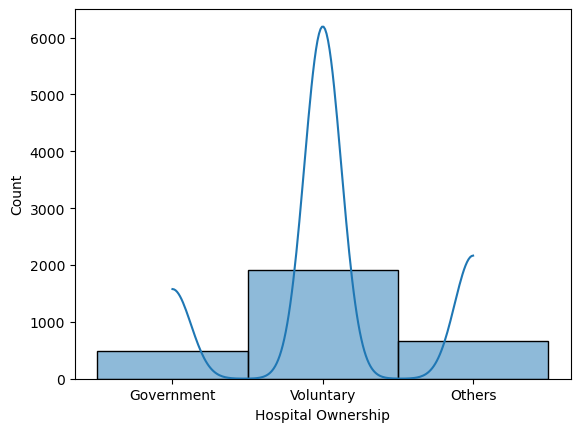

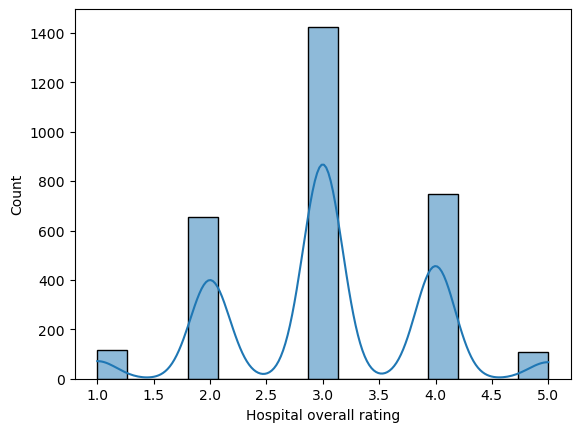

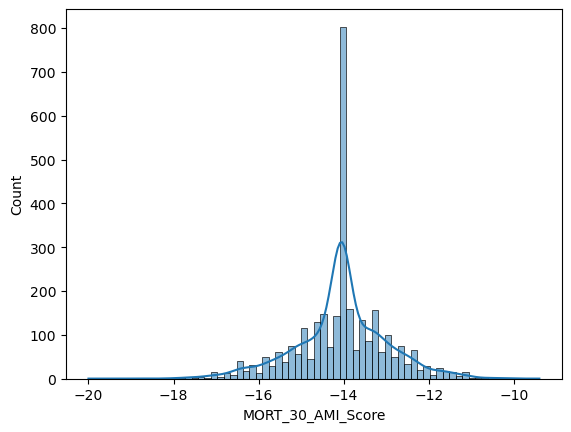

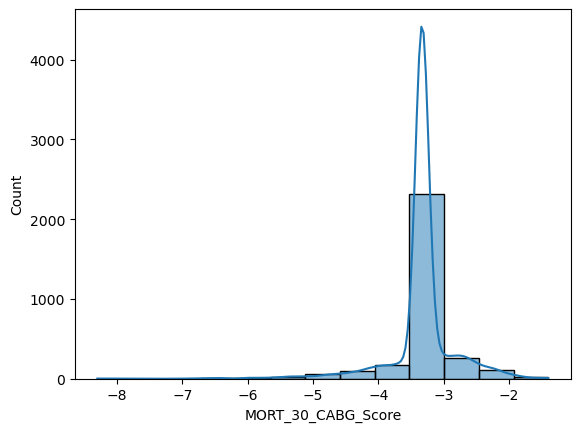

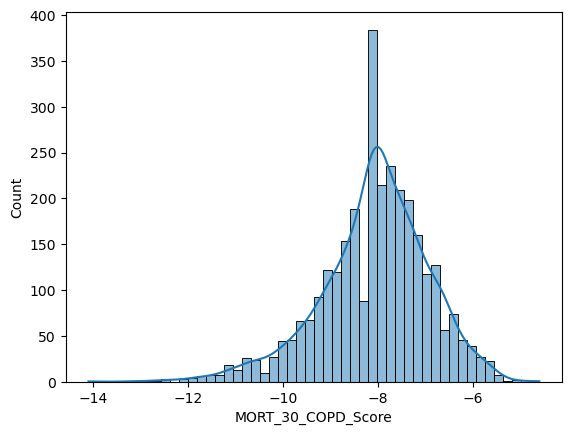

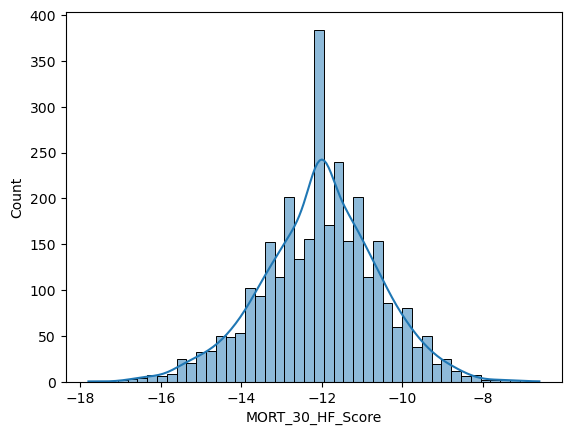

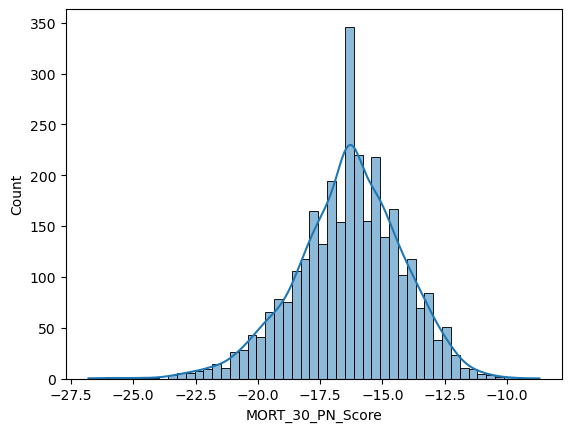

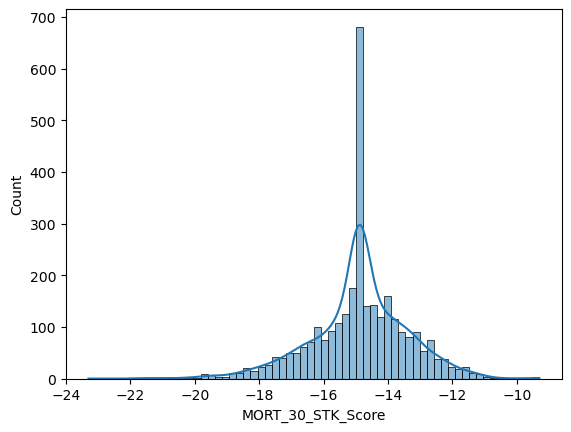

In [112]:
for col in df_mort.columns:
    sns.histplot(df_mort[col],kde=True)
    plt.show()

In [114]:
mort_measures = df_mort.columns 
df_mort1=data1[['Provider ID','Hospital Ownership','Hospital overall rating','MORT_30_AMI_Score', 'MORT_30_CABG_Score', 
                'MORT_30_COPD_Score','MORT_30_HF_Score', 'MORT_30_PN_Score','MORT_30_STK_Score']]
df_mort1

,Provider ID,Hospital Ownership,Hospital overall rating,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score
0,10001,Government,3,-12.500000,-4.200000,-9.300000,-12.400000,-15.5,-15.40000
1,10005,Government,3,-16.000000,-3.331371,-7.600000,-15.500000,-20.8,-15.50000
2,10006,Government,2,-16.700000,-4.100000,-7.100000,-15.600000,-18.2,-17.90000
3,10007,Voluntary,3,-14.054091,-3.331371,-9.300000,-14.400000,-18.8,-16.60000
4,10008,Others,3,-14.054091,-3.331371,-8.200000,-12.700000,-15.7,-14.88976
...,...,...,...,...,...,...,...,...,...
3052,670085,Voluntary,4,-14.054091,-3.331371,-7.800000,-10.200000,-15.7,-14.88976
3053,670088,Voluntary,3,-14.100000,-3.331371,-7.900000,-11.300000,-15.5,-15.10000
3054,670092,Others,3,-14.000000,-3.331371,-8.074015,-11.500000,-15.2,-14.88976
3055,670096,Others,3,-13.400000,-3.331371,-8.700000,-12.700000,-15.0,-14.88976


###### We break the rating into 3 groups for visualization group 0, rating 1 & 2 -low,group 2, rating 3- average, group 3, rating 4 & 5 - high

In [69]:
rating_group_map = {1: 0,2:0,3:1,4:2,5:2}
df_mort1["rating_group"]=data1["Hospital overall rating"].map(rating_group_map).astype(float)

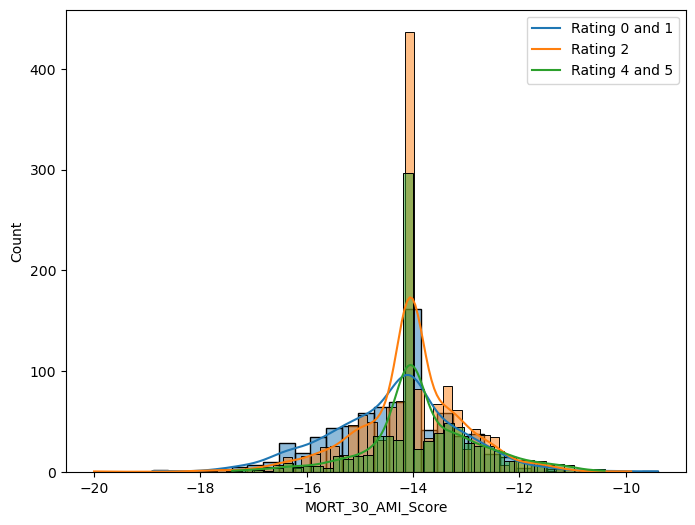

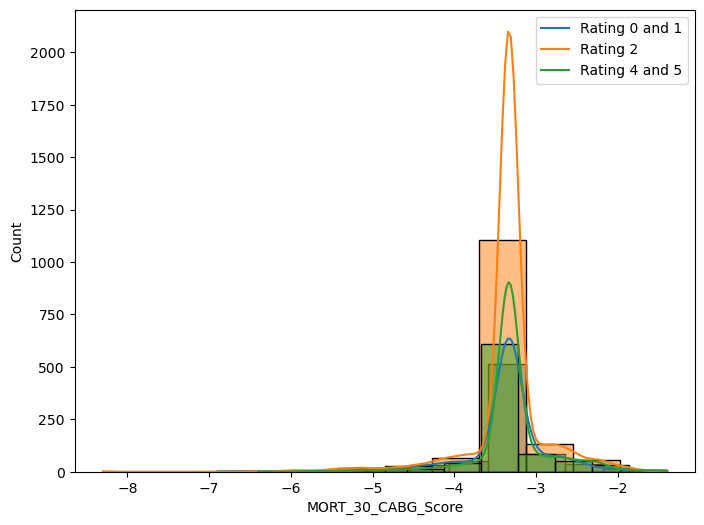

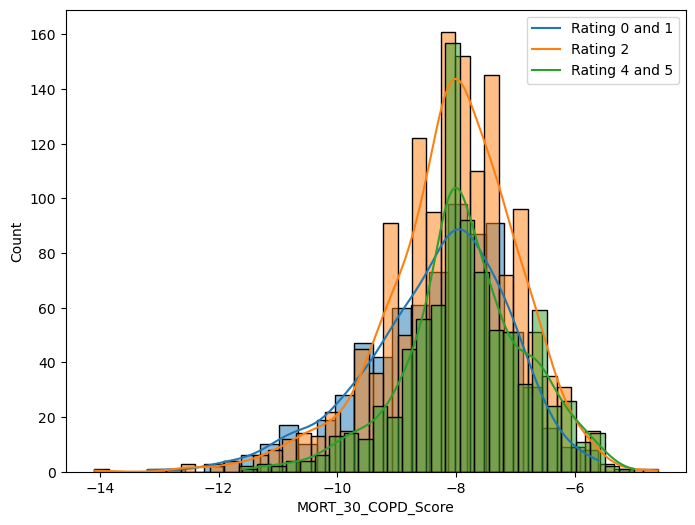

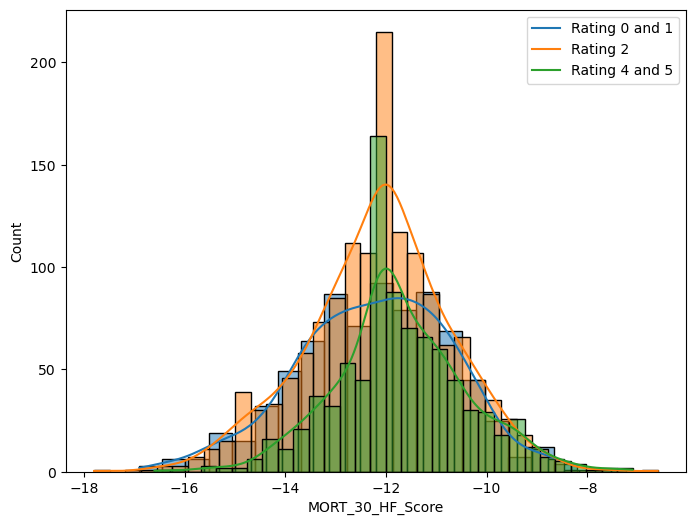

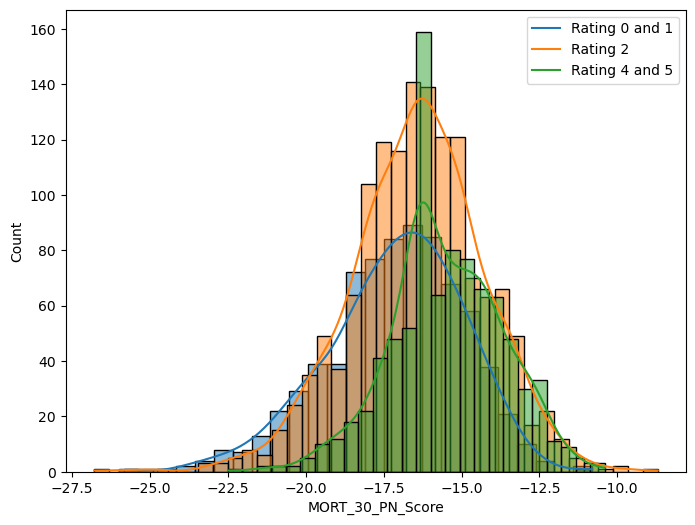

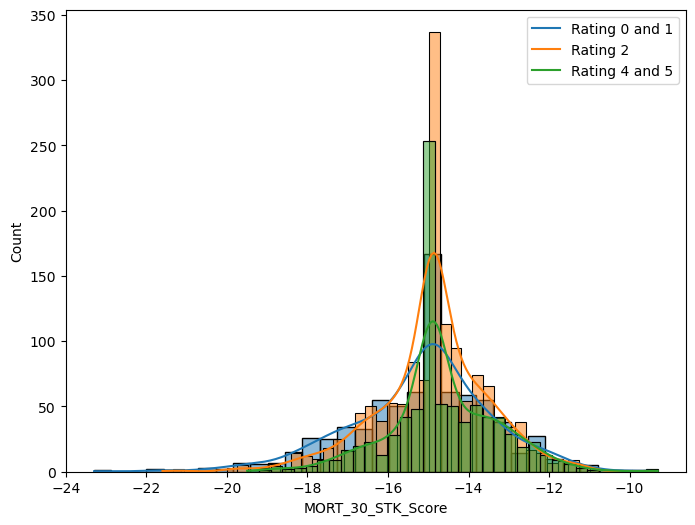

In [81]:
for measure in mort_measures:
    plt.figure(figsize=(8,6))
    sns.histplot(df_mort1.loc[df_mort1["rating_group"] == 0, measure], kde=True,  label="Rating 0 and 1")
    sns.histplot(df_mort1.loc[df_mort1["rating_group"] == 1, measure], kde=True, label="Rating 2")
    sns.histplot(df_mort1.loc[df_mort1["rating_group"] == 2, measure], kde= True, label="Rating 4 and 5")
    plt.legend(["Rating 0 and 1", "Rating 2", "Rating 4 and 5"])
    plt.show()



##### mort_30_PN and mort_30_AMI are the 2 most important measure as their distribution can easily seperated for different rating
##### all the measure are negatively corelated with rating, so we multiply them ny -1 so that all measure transale higher the better

In [115]:
measures= ['MORT_30_AMI_Score', 'MORT_30_CABG_Score', 
                'MORT_30_COPD_Score','MORT_30_HF_Score', 'MORT_30_PN_Score','MORT_30_STK_Score']
df_mort1=-1*df_mort1[measures]
df_mort1

,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score
0,12.500000,4.200000,9.300000,12.400000,15.5,15.40000
1,16.000000,3.331371,7.600000,15.500000,20.8,15.50000
2,16.700000,4.100000,7.100000,15.600000,18.2,17.90000
3,14.054091,3.331371,9.300000,14.400000,18.8,16.60000
4,14.054091,3.331371,8.200000,12.700000,15.7,14.88976
...,...,...,...,...,...,...
3052,14.054091,3.331371,7.800000,10.200000,15.7,14.88976
3053,14.100000,3.331371,7.900000,11.300000,15.5,15.10000
3054,14.000000,3.331371,8.074015,11.500000,15.2,14.88976
3055,13.400000,3.331371,8.700000,12.700000,15.0,14.88976


In [116]:
df_readm = data1[['Provider ID','Hospital Ownership','Hospital overall rating','READM_30_AMI_Score','READM_30_CABG_Score','READM_30_COPD_Score','READM_30_HF_Score',
                  'READM_30_HIP_KNEE_Score','READM_30_HOSP_WIDE_Score','READM_30_PN_Score','READM_30_STK_Score']]
df_readm.set_index('Provider ID', inplace = True)
df_readm

,Hospital Ownership,Hospital overall rating,READM_30_AMI_Score,READM_30_CABG_Score,READM_30_COPD_Score,READM_30_HF_Score,READM_30_HIP_KNEE_Score,READM_30_HOSP_WIDE_Score,READM_30_PN_Score,READM_30_STK_Score
Provider ID,,,,,,,,,,
10001,Government,3,16.500000,15.10000,21.1,21.4,5.100000,15.4,18.7,12.700000
10005,Government,3,16.700000,14.40761,18.0,21.9,5.700000,14.9,16.4,13.400000
10006,Government,2,16.100000,15.20000,19.8,20.6,5.000000,15.4,17.9,12.000000
10007,Voluntary,3,16.893574,14.40761,19.9,21.1,4.615622,16.6,17.3,12.700000
10008,Others,3,16.893574,14.40761,19.2,23.1,4.615622,15.7,16.0,12.585075
...,...,...,...,...,...,...,...,...,...,...
670085,Voluntary,4,16.893574,14.40761,18.8,21.4,4.615622,15.2,15.5,12.585075
670088,Voluntary,3,17.700000,14.40761,19.3,21.4,4.700000,15.6,17.5,12.100000
670092,Others,3,17.000000,14.40761,19.8,22.6,4.615622,15.7,18.1,12.585075


In [118]:
df_readm.isnull().mean()

Hospital Ownership          0.0
Hospital overall rating     0.0
READM_30_AMI_Score          0.0
READM_30_CABG_Score         0.0
READM_30_COPD_Score         0.0
READM_30_HF_Score           0.0
READM_30_HIP_KNEE_Score     0.0
READM_30_HOSP_WIDE_Score    0.0
READM_30_PN_Score           0.0
READM_30_STK_Score          0.0
dtype: float64

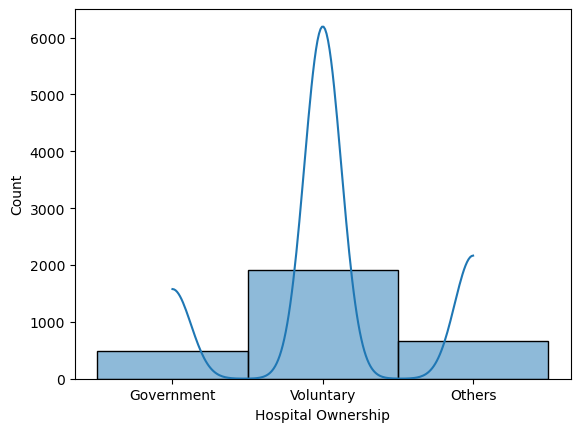

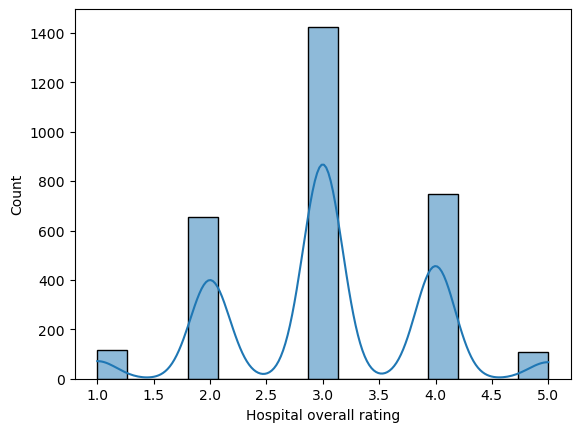

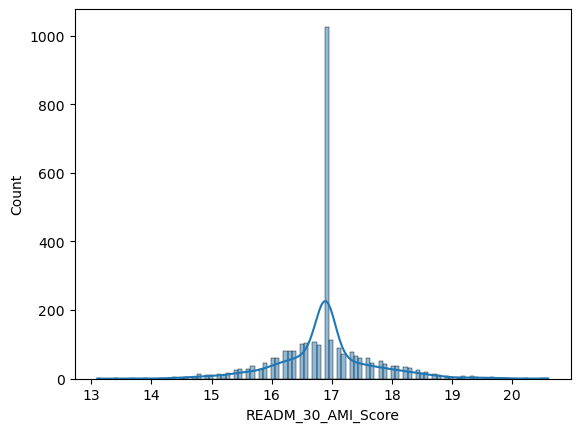

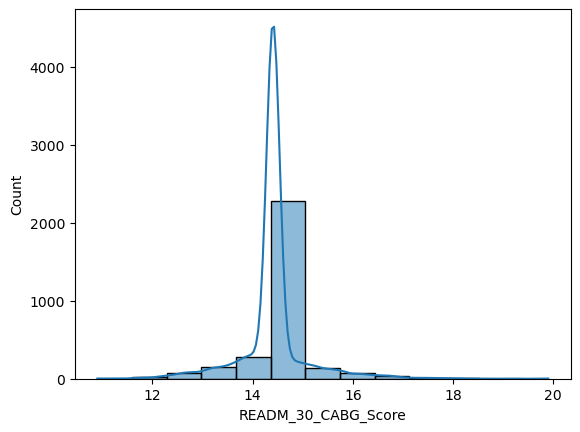

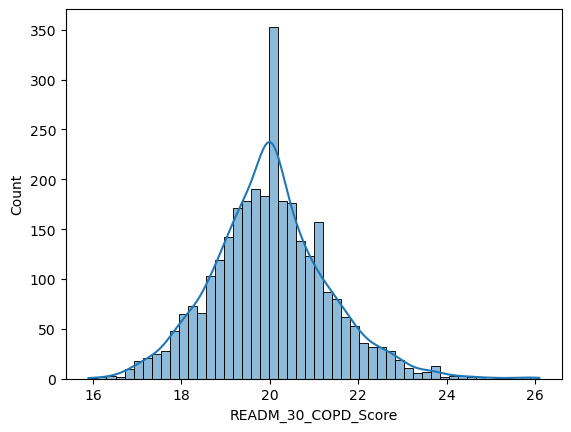

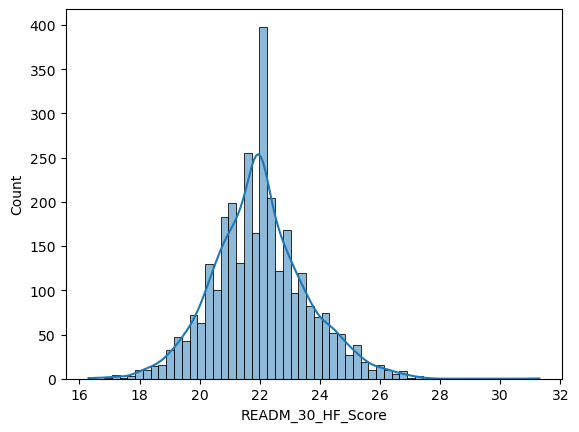

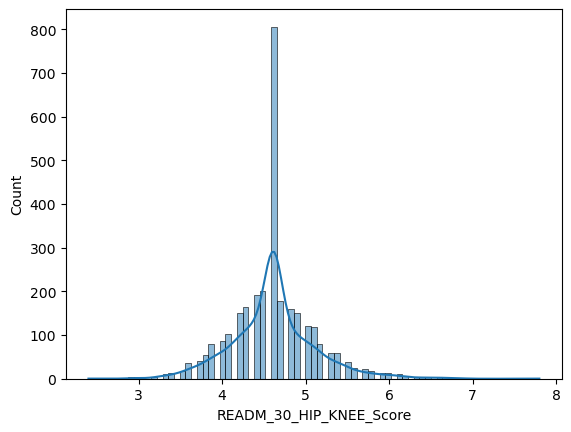

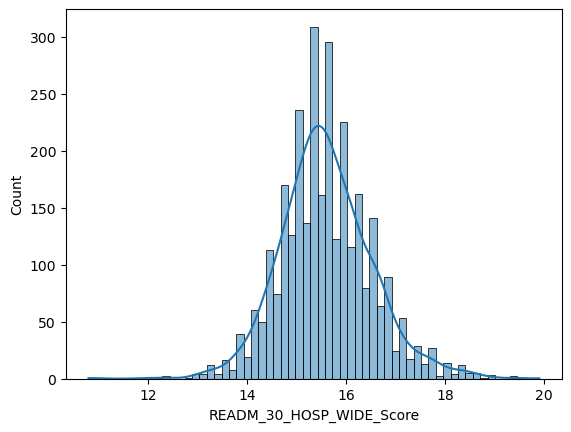

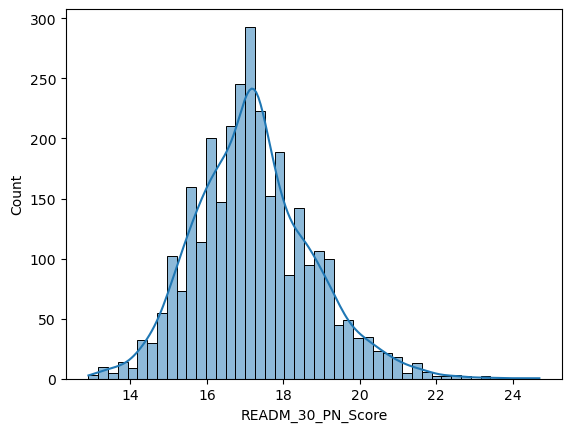

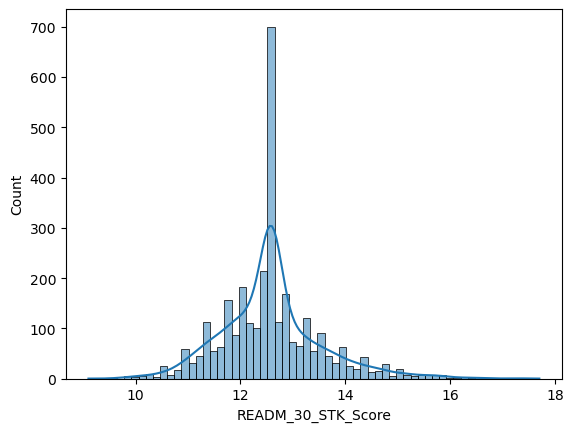

In [117]:
for col in df_readm.columns:
    sns.histplot(df_readm[col],kde=True)
    plt.show()

###### Obervation
##### 1 Most of the measure in readmission clearly separat different rating group and are important
##### 2 All measures on readmission are again negatively corelated so we invert them

In [120]:
df_readm = -1*df_readm
df_readm.head()

,Hospital Ownership,Hospital overall rating,READM_30_AMI_Score,READM_30_CABG_Score,READM_30_COPD_Score,READM_30_HF_Score,READM_30_HIP_KNEE_Score,READM_30_HOSP_WIDE_Score,READM_30_PN_Score,READM_30_STK_Score
Provider ID,,,,,,,,,,
10001,,3,16.500000,15.10000,21.1,21.4,5.100000,15.4,18.7,12.700000
10005,,3,16.700000,14.40761,18.0,21.9,5.700000,14.9,16.4,13.400000
10006,,2,16.100000,15.20000,19.8,20.6,5.000000,15.4,17.9,12.000000
10007,,3,16.893574,14.40761,19.9,21.1,4.615622,16.6,17.3,12.700000
10008,,3,16.893574,14.40761,19.2,23.1,4.615622,15.7,16.0,12.585075


#### Patient Experience

In [121]:
df_exp= data1[['Provider ID','Hospital Ownership','Hospital overall rating','EXP_H_CLEAN_STAR_RATING_Score','EXP_H_COMP_1_STAR_RATING_Score','EXP_H_COMP_2_STAR_RATING_Score',
               'EXP_H_COMP_3_STAR_RATING_Score','EXP_H_COMP_4_STAR_RATING_Score','EXP_H_COMP_5_STAR_RATING_Score',
               'EXP_H_COMP_6_STAR_RATING_Score','EXP_H_COMP_7_STAR_RATING_Score','EXP_H_HSP_RATING_STAR_RATING_Score','EXP_H_QUIET_STAR_RATING_Score',
               'EXP_H_RECMND_STAR_RATING_Score','EXP_H_STAR_RATING_Score']]
df_exp.set_index('Provider ID', inplace = True)
df_exp

,Hospital Ownership,Hospital overall rating,EXP_H_CLEAN_STAR_RATING_Score,EXP_H_COMP_1_STAR_RATING_Score,EXP_H_COMP_2_STAR_RATING_Score,EXP_H_COMP_3_STAR_RATING_Score,EXP_H_COMP_4_STAR_RATING_Score,EXP_H_COMP_5_STAR_RATING_Score,EXP_H_COMP_6_STAR_RATING_Score,EXP_H_COMP_7_STAR_RATING_Score,EXP_H_HSP_RATING_STAR_RATING_Score,EXP_H_QUIET_STAR_RATING_Score,EXP_H_RECMND_STAR_RATING_Score,EXP_H_STAR_RATING_Score
Provider ID,,,,,,,,,,,,,,
10001,Government,3,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.00000
10005,Government,3,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,2.000000,4.000000,4.000000,3.000000,3.00000
10006,Government,2,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,4.000000,2.000000,3.00000
10007,Voluntary,3,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,5.000000,3.000000,4.00000
10008,Others,3,2.716745,3.418636,3.097569,3.163403,3.077313,2.956448,3.287981,2.536462,3.409858,2.904794,3.082377,3.09892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670085,Voluntary,4,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.00000
670088,Voluntary,3,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,5.000000,4.00000
670092,Others,3,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,5.000000,3.000000,3.00000


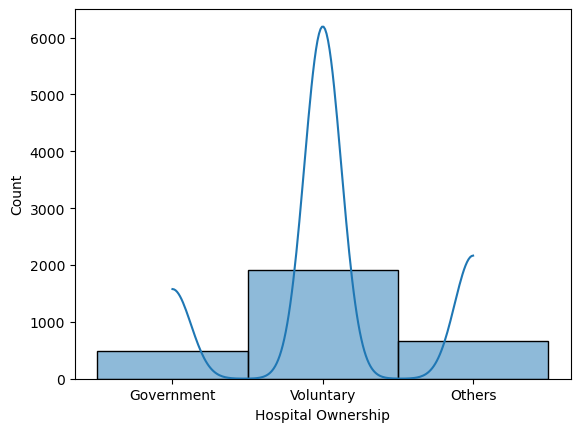

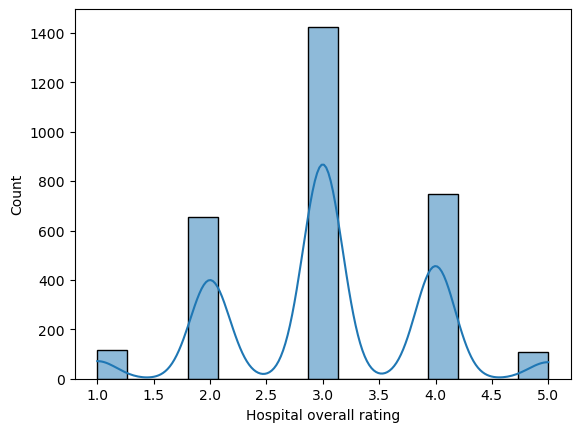

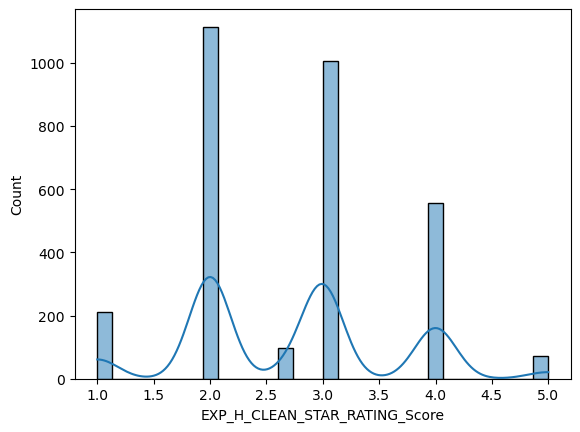

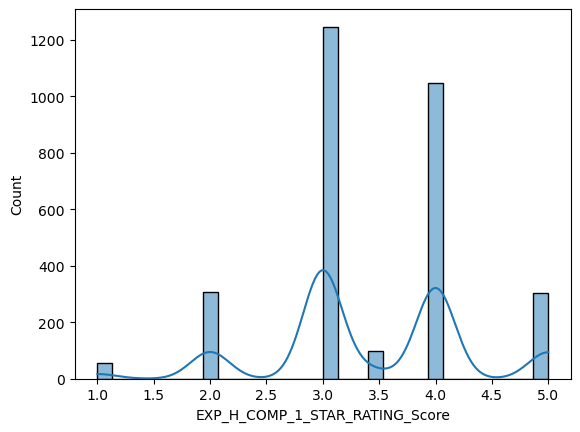

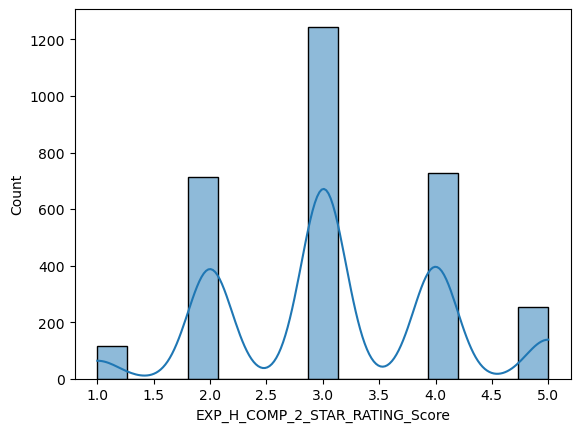

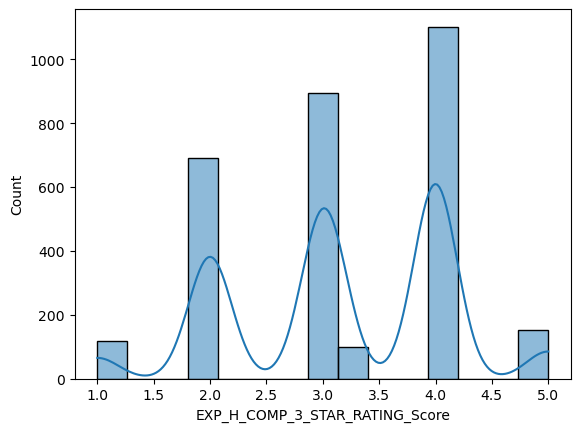

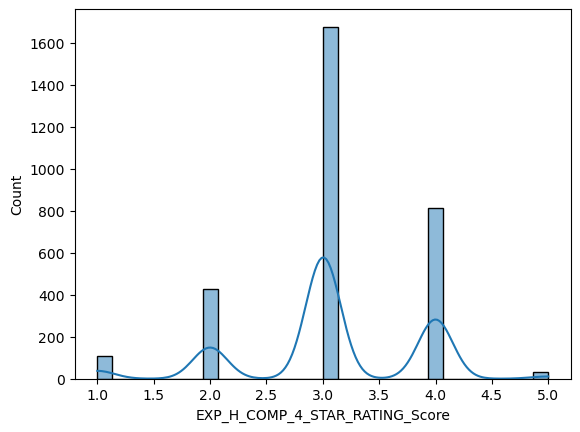

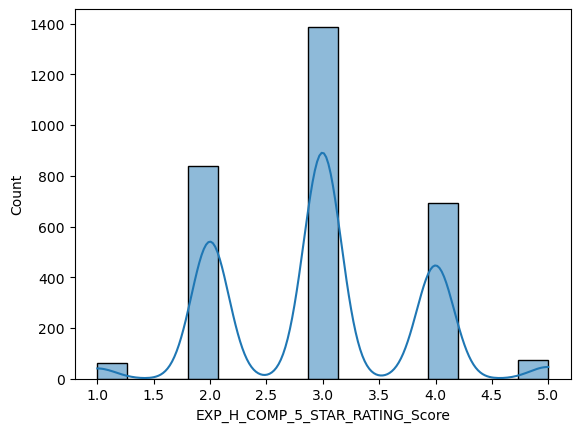

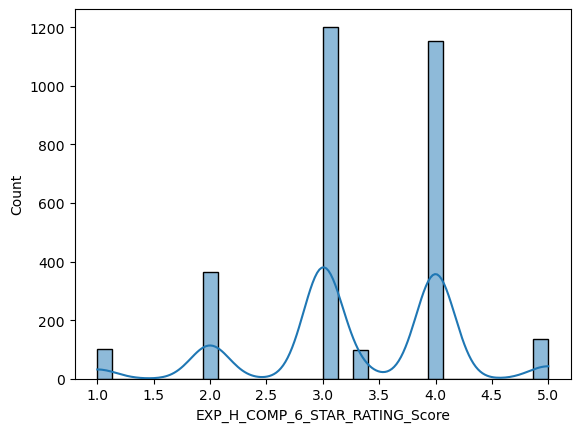

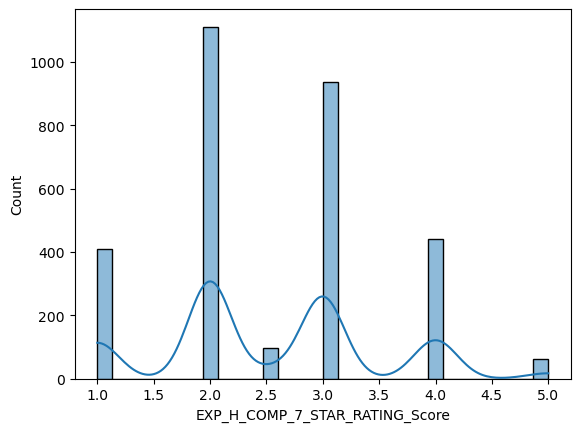

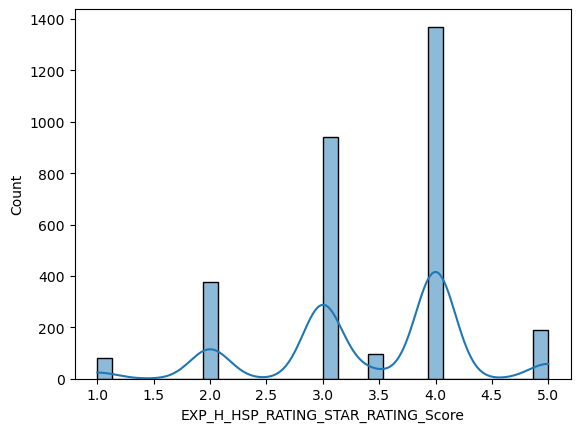

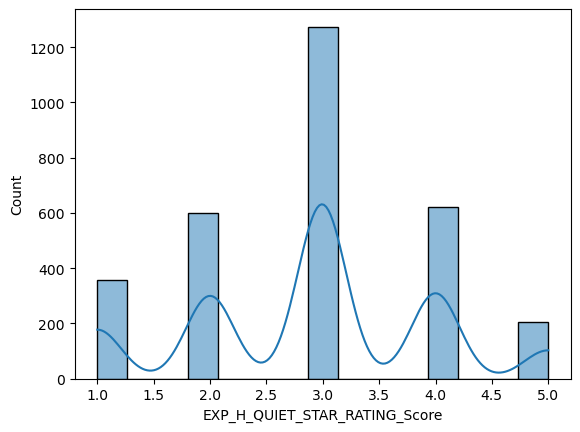

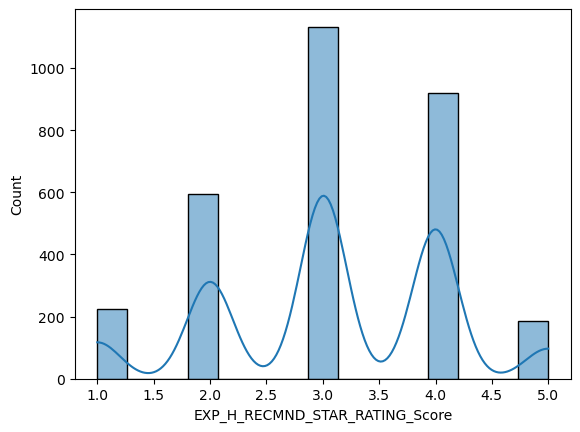

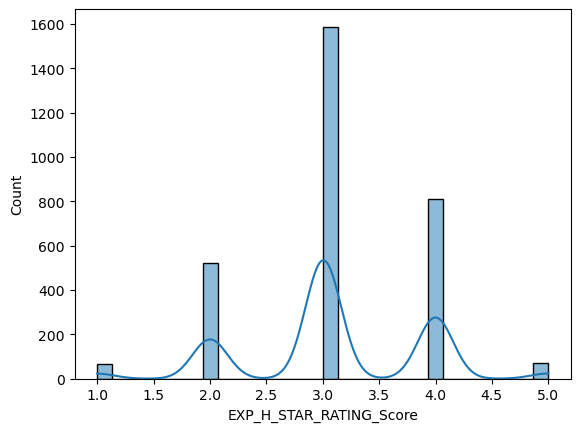

In [122]:
for col in df_exp.columns:
    sns.histplot(df_exp[col],kde=True)
    plt.show()

### All star rating seem to have good corelation with overall rating

##### Safety

In [123]:
df_safety= data1[['Provider ID','Hospital Ownership','Hospital overall rating', 'SAFETY_HAI_1_SIR_Score','SAFETY_HAI_1a_SIR_Score',
                  'SAFETY_HAI_2_SIR_Score','SAFETY_HAI_2a_SIR_Score','SAFETY_HAI_3_SIR_Score','SAFETY_HAI_4_SIR_Score',
                  'SAFETY_HAI_5_SIR_Score','SAFETY_HAI_6_SIR_Score']]

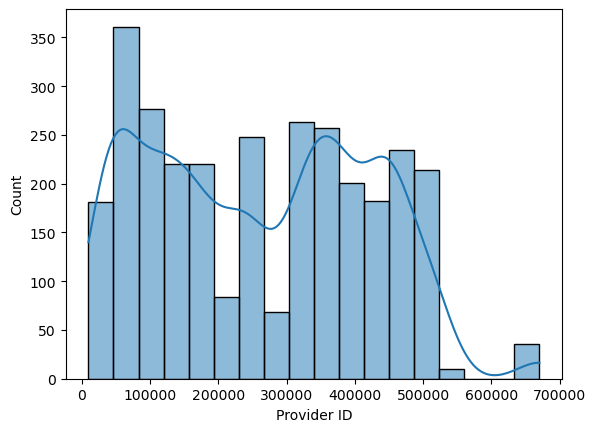

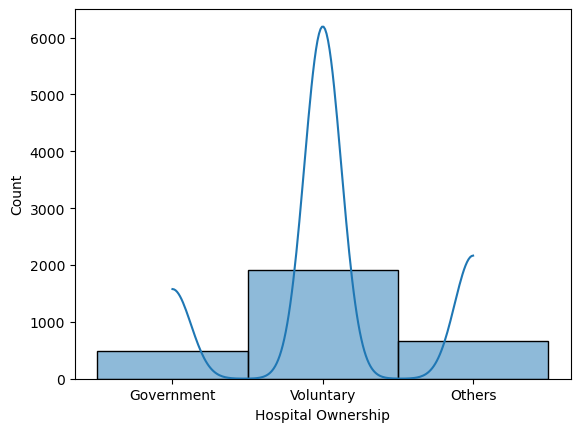

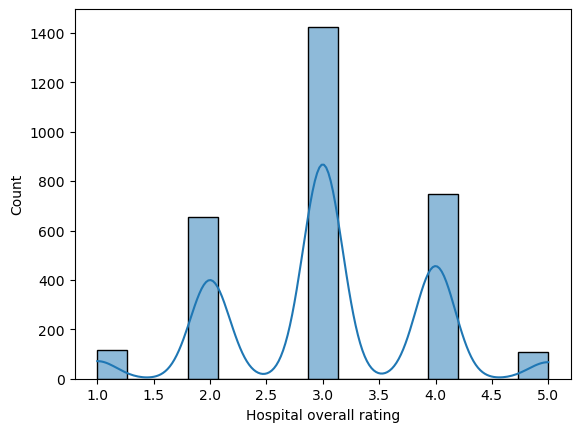

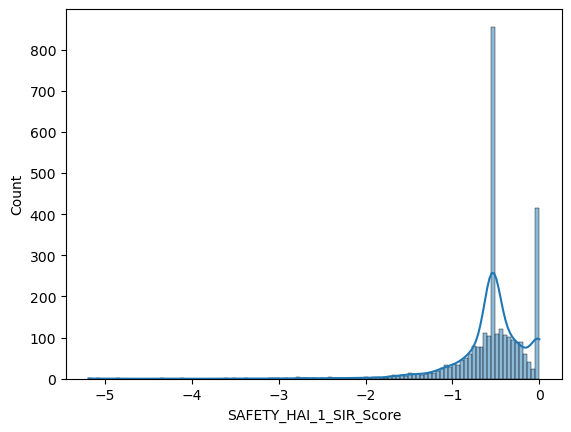

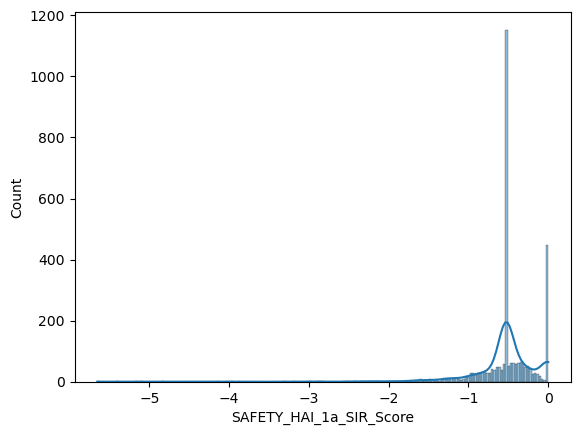

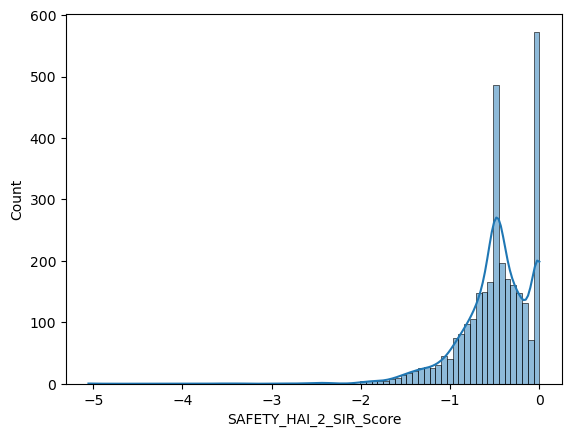

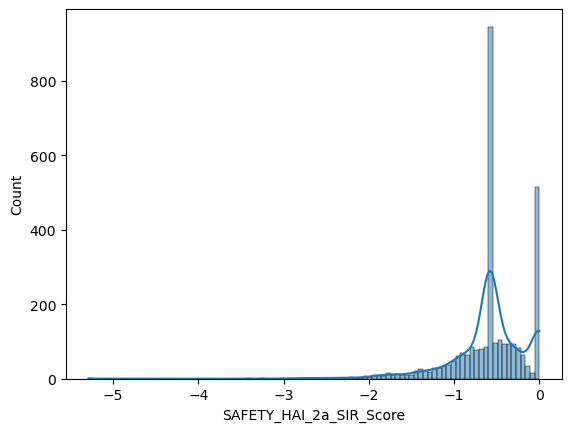

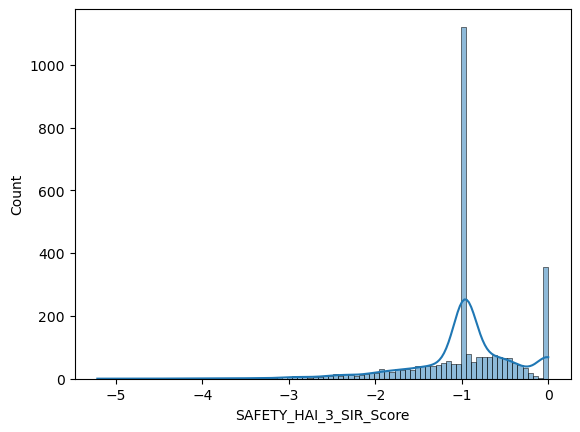

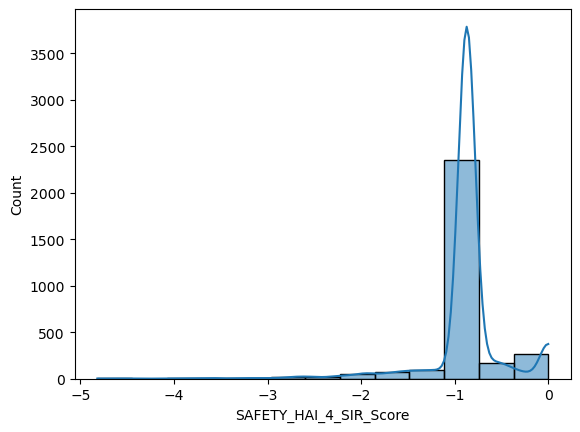

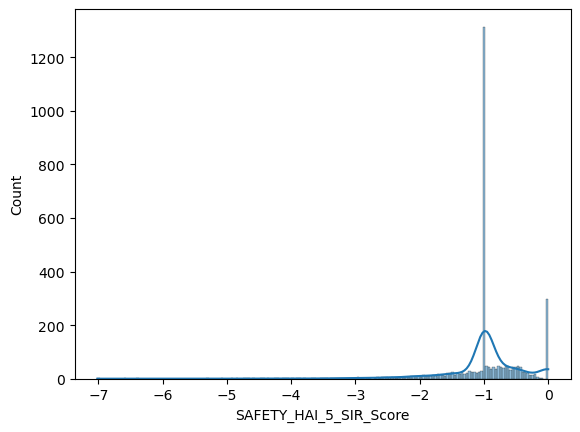

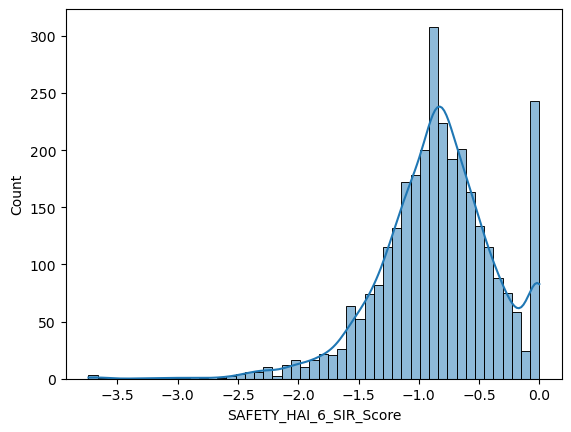

In [124]:
for col in df_safety.columns:
    sns.histplot(df_safety[col],kde=True)
    plt.show()


Note down your observations after completing the above task. You should ask questions such as:

- How are ratings distributed? the Are you seeing any peculiar distributions for the ratings?
- How do the correlations between the measures and the target variable look like?
- How do ratings vary across the different levels of the parameter that you have taken?

### Task 2 - Building machine learning models

Use your knowledge of classification models to create three models that predict hospital ratings. You should follow these steps:

- Prepare the data for the machine learning model 
   - Remove all the demographic columns as well as any other uneccessary features from the data set
   - For simplification, instead of having 5 ratings, we will convert them to 0 and 1. Here 0 indicates that the hospital has been rated 3 or below and 1 indicates that the hospital has been rated as 4 or 5.  Encode the Hospital columns as follows
            1,2,3 : 0
            4,5: 1
   - Store the predictors and the target variable in variables X and y.
   - Create the dummy variables for categorical columns.
   - Split the data into train and test sets (70-30 split with random state 0. This random state is recommended, though you can use any other random state of your choice).
   - Scale the numerical columns using StandardScaler.
- Build 3 classification models on your dataset. Carefully apply regularization and hyperparameter tuning techniques to improve your model performance for each of the models.
- Summarize the classification performance in terms of the necessary metrics such as accuracy, sensitivity, specificity, etc.

#####  Prepare the data for machine learning model

In [ ]:
## Drop all the demographic features
demo_features = ['Provider ID','Hospital Name',
 'Address',
 'City',
 'State',
 'ZIP Code',
 'County Name',
 'Phone Number']

In [ ]:
## Drop all the above features from the DataFrame df and store the rest of the features in df2
df2 = 

In [ ]:
### Check the first 5 rows of df2 to see if the drop operation has worked correctly or not

In [ ]:
##Recheck the columns to see if anything else needs to be dropped
## There might be other unnecessary columns that require dropping


##### Map the ratings 

- 1,2,3 will be 0
- 4,5 will be 1

In [ ]:
## Hint -  Write a simple lambda function to do the mapping
## Refer to this link from Course 1 for more help -  https://learn.upgrad.com/course/2897/segment/16179/128948/394776/2054363

##### Convert the datatypes of the categorical variables

In [ ]:
### In task 1, you would have identified the categorical variables, which may or may not be in their correct data types
### Now is the right time to convert them to the correct datatype 
### This will be useful when you create dummy variables next

##### Data Preparation and Train-test split

In [ ]:
### Create X and y variable

In [ ]:
### Create the dummy variables for categorical variables
### Note - Make sure the "drop_first parameter" is correctly initialized for different ML models
### Hint - You can create multiple versions of the X dataset


In [ ]:
## Perform the train_test split to create the train and validation sets
## Choose any random state of your choice 
## Split it in the ratio of 70-30


In [ ]:
# Scale and Standardize the numerical variables

#####  Model building and evaluation

You have learned multiple classification models till now, such as logistic regression, k-NN and decision trees. You should choose 3 of the models for performing the tasks in this section. You can follow the below steps:


- Build the models and fit it on training data
- Perform classifications on the validation data
- Compute and tabulate the validation accuracies for the different models
- Compare the accuracies for the different models and choose the best model

**Note** - You can also evaluate your models using additional metrics like `F1 score`, `Sensitivity`,`Specificity` , etc.


**Helpful Resource** - For writing precise code for this section, you can refer to the code you learned in Model Selection Lab Session in the `kNN and Model Selection` module.




- Additional notes
  - You can peform additional tasks like building ROC/AUC curves for all the models and identifying an optimal cut-off
  - You can also build conjectures around some arbitrary metric cut-offs. For example, say you want to build a model which has atleast 50% accuracy, specificity and sensitivity. Use these conjectures to arrive at a final model
  - Note that there is no right answer for this particular question. You will be awarded marks as long as your overall approach is correct

### Task 3 

You have now built (at least) three machine learning models. Choose the best model according to your metrics and provide the following recommendations
-  Hospital Rating Predictor: Using the best model of your choice, predict the ratings of a few new hospitals which are yet to be assigned a rating by CMS. The information for these hospitals has been provided in a separate CSV file named 'not_yet_rated.csv'.
- Hospital Improvement Plan: Let's say a few of the hospitals were rated low (0) by the model that you chose. Provide recommendations on how these hospitals can improve their ratings

In [ ]:
###Let's read the not_yet_rated dataset
new = ### Write your code to load the dataset

In [ ]:
## Check the top 5 rows

### Approach to predict ratings
- Perform the exact same data preparation steps as earlier
   - Drop the unnecessary columns
   - Convert the datatypes of categorical variables and create dummies
   - Standardize the numeric columns
- After that we shall use the `.predict()` method of your ML model to predict the ratings

### Approach to identify areas of improvement

- Identify the measures which have a positive influence on the overall hospital ratings. For example,
    - if you're using a logistic regression model, you can check the coefficients
        - A +ve coefficient indicates +ve influence on the overall hospital rating
        - A -ve coefficient indicates -ve influence on the overall hospital rating
- Identify in which of the above measures a low-rated hospital is currently lagging behind. These measures need to be improved.
- Further deep dive into the sub-measures using the same approach as above. 